# Predicting Loan Payback

This project focuses on building a machine learning model to predict whether a borrower will repay their loan on time based on various features such as credit score, income, loan amount, and employment status. 

## Importing Libraries

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from zipfile import ZipFile

# Sklearn Imports 
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, power_transform
from sklearn.ensemble import RandomForestClassifier

# Ignore Warnings
import warnings 
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
# loading from zipped file downloaded from kaggle
# path= r"C:\Users\owolabi michael\Downloads\Compressed\playground-series-s5e11.zip"
path= r"C:\Users\OLASQUARE\Downloads\Compressed\playground-series-s5e11_2.zip"
# viewing contents of the zip file
with ZipFile(path, 'r') as zip_ref:
    zip_ref.printdir()


File Name                                             Modified             Size
sample_submission.csv                          2025-10-28 23:08:48      2291139
test.csv                                       2025-10-28 23:08:48     23021430
train.csv                                      2025-10-28 23:08:50     55988519


In [ ]:
# loading the dataset
with ZipFile(path, 'r') as zip_ref:
    # loading the train data
    with zip_ref.open("train.csv") as tr:
        train_df= pd.read_csv(tr)

    # loading the test data
    with zip_ref.open("test.csv") as te:
        test_df= pd.read_csv(te)

In [ ]:
#   making the copy of the data
train_data=train_df.copy()
test_data=test_df.copy()
train_data.head(5)

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [ ]:
test_data.head(5)

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
0,593994,28781.05,0.049,626,11461.42,14.73,Female,Single,High School,Employed,Other,D5
1,593995,46626.39,0.093,732,15492.25,12.85,Female,Married,Master's,Employed,Other,C1
2,593996,54954.89,0.367,611,3796.41,13.29,Male,Single,Bachelor's,Employed,Debt consolidation,D1
3,593997,25644.63,0.110,671,6574.30,9.57,Female,Single,Bachelor's,Employed,Debt consolidation,C3
4,593998,25169.64,0.081,688,17696.89,12.80,Female,Married,PhD,Employed,Business,C1


## Exploratory Data Analysis (EDA)

### Data Descriptions

In [ ]:
# shapes of the datasets
print("Train data Shape: ",train_data.shape)
print("Test data Shape",test_data.shape)


Train data Shape:  (593994, 13)
Test data Shape (254569, 12)


In [ ]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,593994.0,296996.500000,171471.442235,0.000,148498.250,296996.500,445494.750,593993.000
annual_income,593994.0,48212.202976,26711.942078,6002.430,27934.400,46557.680,60981.320,393381.740
debt_to_income_ratio,593994.0,0.120696,0.068573,0.011,0.072,0.096,0.156,0.627
credit_score,593994.0,680.916009,55.424956,395.000,646.000,682.000,719.000,849.000
loan_amount,593994.0,15020.297629,6926.530568,500.090,10279.620,15000.220,18858.580,48959.950
interest_rate,593994.0,12.356345,2.008959,3.200,10.990,12.370,13.680,20.990
loan_paid_back,593994.0,0.798820,0.400883,0.000,1.000,1.000,1.000,1.000


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB


## checking missing values

In [ ]:
train_data.isna().sum()

id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64

### checking duplicates

In [ ]:
train_data.duplicated().sum()

0

In [ ]:
#  let drop the id column
train_data=train_data.drop(columns='id')
#  let select numerica columns
num_col= train_data.select_dtypes(include='number').columns.drop('loan_paid_back')
num_col

Index(['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount',
       'interest_rate'],
      dtype='object')

In [ ]:
# let check for the presence of outliers and skewness
# def outliers_skew_check(df, columns):
#     df=df.copy()
#     for col in columns:
#         plt.figure(figsize=(10,4))
#         plt.subplot(1,2,1)
#         sns.boxplot(df[col])
#         plt.title(f'Boxplot of {col} skewness: {df[col].skew():.2f}')
#         plt.subplot(1,2,2)
#         sns.histplot(df[col], bins=30, kde=True)
#         plt.title(f'Histogram of {col}skewness: {df[col].skew():.2f}')
#     plt.tight_layout
#     plt.show()
# # calling the function
# outliers_skew_check(train_data, num_col)

In [ ]:
# let select categorical column
cat_col= train_data.select_dtypes(include='object')

In [ ]:
# checking values count for catgeorical data
for col in cat_col:
    print(f"Distribution of {col}:\n {train_data[col].value_counts()}")
    print("==========================\n")

Distribution of gender:
 gender
Female    306175
Male      284091
Other       3728
Name: count, dtype: int64

Distribution of marital_status:
 marital_status
Single      288843
Married     277239
Divorced     21312
Widowed       6600
Name: count, dtype: int64

Distribution of education_level:
 education_level
Bachelor's     279606
High School    183592
Master's        93097
Other           26677
PhD             11022
Name: count, dtype: int64

Distribution of employment_status:
 employment_status
Employed         450645
Unemployed        62485
Self-employed     52480
Retired           16453
Student           11931
Name: count, dtype: int64

Distribution of loan_purpose:
 loan_purpose
Debt consolidation    324695
Other                  63874
Car                    58108
Home                   44118
Education              36641
Business               35303
Medical                22806
Vacation                8449
Name: count, dtype: int64

Distribution of grade_subgrade:
 grade_subgrade


## Preprocesssing

From the EDA, there are right skewed and left skew observed.. Power transformation is recommender

In [ ]:
# Let split the data to X and y
X= train_data.drop(columns='loan_paid_back')
y= train_data['loan_paid_back']

In [ ]:
# let power transform the numerical columns to reduce skewness
def power_transformer(df, columns:list):
    df=df.copy()
    df[columns]= power_transform(df[columns], method='yeo-johnson')
    return df

# let power transform the numerical columns in X
num_col= X.select_dtypes(include='number').columns
X= power_transformer(X, num_col)

# let check for the presence of outliers and skewness after power transformation
# outliers_skew_check(X, num_col)

### Encoding categorical data

In [ ]:
cat_col= train_data.select_dtypes(include='object').columns
cat_col
# 

Index(['gender', 'marital_status', 'education_level', 'employment_status',
       'loan_purpose', 'grade_subgrade'],
      dtype='object')

In [ ]:
# one hot encoding categorical columns
def one_hot_encoder(df, columns:list):
    df=df.copy()
    df= pd.get_dummies(df, columns=columns, drop_first=True)
    return df

# column to be encoded [gender,marital_status,employment_status]
cat=['gender','marital_status','employment_status','loan_purpose']
X= one_hot_encoder(X, cat)

In [ ]:
# manual encoding target column [education_level,grade_subgrade]
def manual_encoder(df, column:str, mapping:dict):
    df=df.copy()
    df[column]= df[column].map(mapping)
    return df


In [ ]:
# encoding education_level
edu_order = {
    "High School": 1,
    "Bachelor's": 2,
    "Master's": 3,
    "PhD": 4,
    "Other": 0
}
X= manual_encoder(X, 'education_level', edu_order)

In [ ]:
# ecoding grade_subgrade
grade_order = [
    'A1','A2','A3','A4','A5',
    'B1','B2','B3','B4','B5',
    'C1','C2','C3','C4','C5',
    'D1','D2','D3','D4','D5',
    'E1','E2','E3','E4','E5',
    'F1','F2','F3','F4','F5']

grade_mapping= {grade: idx+1 for idx, grade in enumerate(grade_order)}
X= manual_encoder(X, 'grade_subgrade', grade_mapping)

### Scaling

In [ ]:
# let scale the numerical columns using minmax scaler
scaler= MinMaxScaler()
X[num_col]= scaler.fit_transform(X[num_col])

In [ ]:
# let check the final feature set
X.head(5)

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,education_level,grade_subgrade,gender_Male,gender_Other,marital_status_Married,...,employment_status_Self-employed,employment_status_Student,employment_status_Unemployed,loan_purpose_Car,loan_purpose_Debt consolidation,loan_purpose_Education,loan_purpose_Home,loan_purpose_Medical,loan_purpose_Other,loan_purpose_Vacation
0,0.280082,0.462105,0.706271,0.070202,0.605632,1,13,False,False,False,...,True,False,False,False,False,False,False,False,True,False
1,0.222801,0.722375,0.470074,0.129175,0.564250,3,18,True,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.395173,0.516688,0.604288,0.415457,0.387295,1,15,True,False,False,...,False,False,False,False,True,False,False,False,False,False
3,0.382196,0.369964,0.251331,0.131585,0.738331,1,26,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0.251135,0.303016,0.536210,0.312339,0.412778,1,16,True,False,True,...,False,False,False,False,False,False,False,False,True,False


### Feature selection

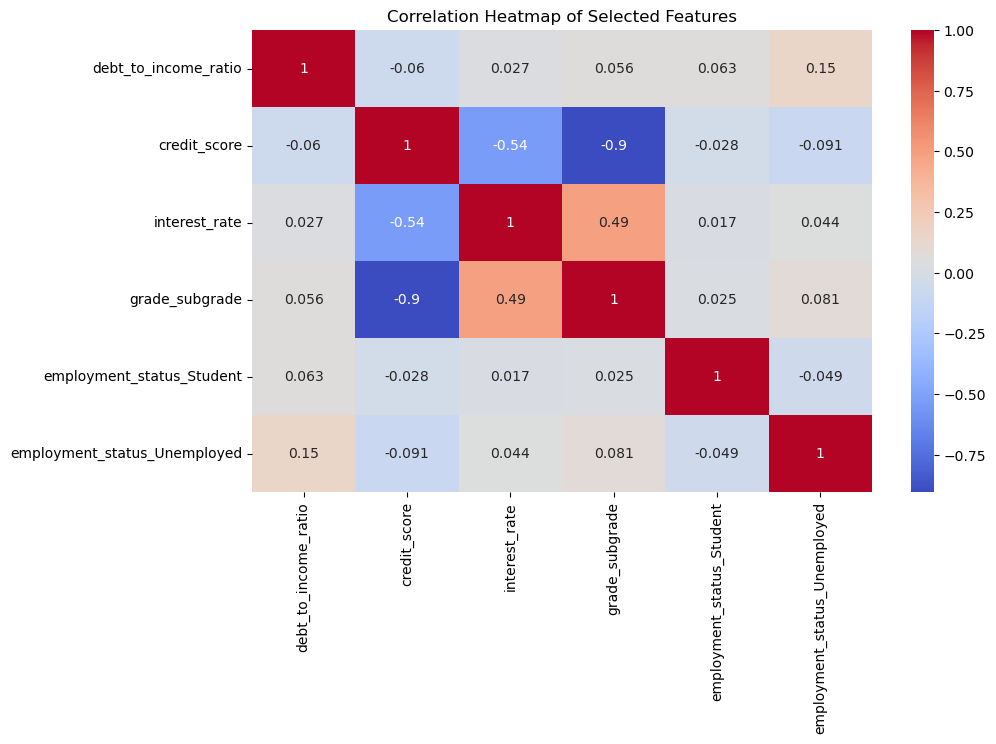

selected features before checking multicollinearity:
['debt_to_income_ratio', 'credit_score', 'interest_rate', 'grade_subgrade', 'employment_status_Student', 'employment_status_Unemployed']
......................

Checking multicollinearity among selected features...
Multicollinearity detected among selected features.
Final selected features after removing multicollinearity:
['debt_to_income_ratio', 'credit_score', 'interest_rate', 'employment_status_Student', 'employment_status_Unemployed']


In [ ]:
# let select features based on correlation
corr= X.corrwith(y).abs()
corr_selected= corr[corr>0.1].index.tolist()

# showing the correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(X[corr_selected].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Selected Features")
plt.show()

# checking multicoli
# selected feature correlate with each other
print(f"selected features before checking multicollinearity:\n{corr_selected}")
print("......................\n")
print("Checking multicollinearity among selected features...")
if np.any(X[corr_selected].corr().abs() > 0.8):
    print("Multicollinearity detected among selected features.")
    # dropping one of the correlated features
    upper_tri= X[corr_selected].corr().abs().where(np.triu(np.ones(X[corr_selected].corr().shape), k=1).astype(bool))
    to_drop= [column for column in upper_tri.columns if any(upper_tri[column]>0.8)]
    selected_features= [feature for feature in corr_selected if feature not in to_drop]
    print(f"Final selected features after removing multicollinearity:\n{selected_features}")
else:
    print("No multicollinearity detected among selected features.")
    selected_features= corr_selected
    print(f"Final selected features:\n{selected_features}")

## Modelling

### Split Data

In [ ]:
# let split our data
X_final= X[selected_features]
X_train, X_val, y_train, y_val= train_test_split(X_final, y, test_size=0.2, random_state=42, stratify=y)

### Initialize Models

In [ ]:
# initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=234),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=234),
    "Random Forest": RandomForestClassifier(random_state=234)
}

### Train and Evaluate model


🔹🔹 ========== Logistic Regression ==========🔹🔹


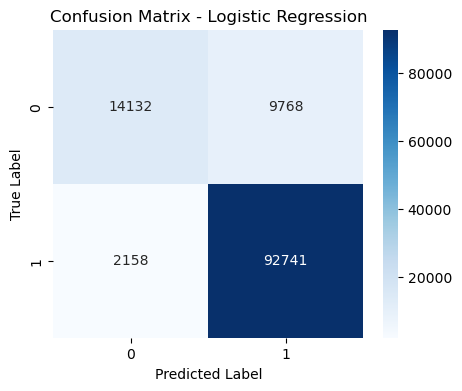

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.59      0.70     23900
         1.0       0.90      0.98      0.94     94899

    accuracy                           0.90    118799
   macro avg       0.89      0.78      0.82    118799
weighted avg       0.90      0.90      0.89    118799


🔹🔹 ========== KNN ==========🔹🔹


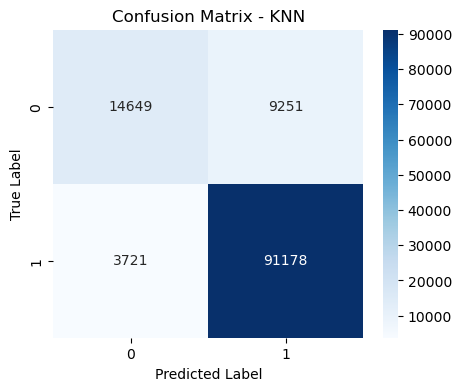

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.61      0.69     23900
         1.0       0.91      0.96      0.93     94899

    accuracy                           0.89    118799
   macro avg       0.85      0.79      0.81    118799
weighted avg       0.89      0.89      0.89    118799


🔹🔹 ========== Decision Tree ==========🔹🔹


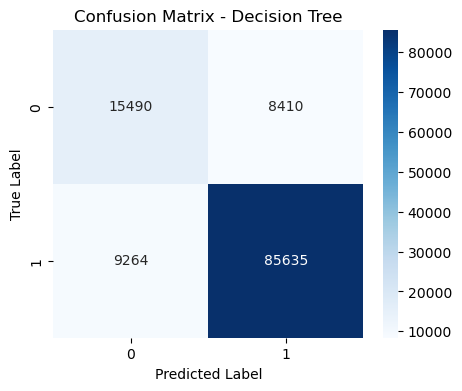

Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      0.65      0.64     23900
         1.0       0.91      0.90      0.91     94899

    accuracy                           0.85    118799
   macro avg       0.77      0.78      0.77    118799
weighted avg       0.85      0.85      0.85    118799


🔹🔹 ========== Random Forest ==========🔹🔹


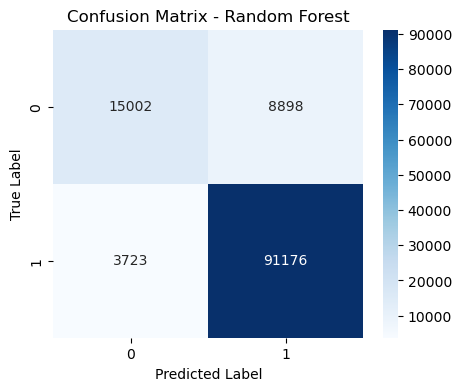

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.63      0.70     23900
         1.0       0.91      0.96      0.94     94899

    accuracy                           0.89    118799
   macro avg       0.86      0.79      0.82    118799
weighted avg       0.89      0.89      0.89    118799



In [ ]:
# Train & Evaluate each model
for name, model in models.items():
    print(f"\n🔹🔹 {'='*10} {name} {'='*10}🔹🔹")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_val, y_pred))

### Tunning the best trained Model

Since Logistic Regression and Random Forest are very close. So, I will tune Random Forest for stability and interpretability of feature importance.

In [ ]:
# # # let tune the best trained Model using Random search
# lg= LogisticRegression(max_iter=1000, random_state=234)
# param_dist = {
#     'C': [0.01, 0.1, 1, 10, 100],
#     'penalty': ['l1', 'l2', 'elasticnet', 'none'],
#     'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']
# }
# random_search = RandomizedSearchCV(
#     estimator=lg,
#     param_distributions=param_dist,
#     n_iter=50,
#     cv=5,
#     verbose=2,
#     random_state=234,
#     n_jobs=-1
# )
# random_search.fit(X_train, y_train)
# best_model = random_search.best_estimator_
# print("Best Hyperparameters:", random_search.best_params_)


# let tune the best trained Model using Random search
rf = RandomForestClassifier(random_state=234)

# parameter random for tuning
param_dist = {
    'n_estimators':[50,100,200],
    'max_depth':[10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
}
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    verbose=2,
    random_state=234,
    n_jobs=-1
)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
print("Best Hyperparameters:", random_search.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


KeyboardInterrupt: 

### Evaluating the best model on test data

In [ ]:
# let do cross validation for the best estimator
best_rf= rf.best_estimator_
cv_scores= cross_val_score(best_rf,X_train,y_train, cv=5)
print(f"Cross-validation scores for Random Forest: {cv_scores}")
print(f"Mean Cross-validation score: {np.mean(cv_scores):.2f}")

In [ ]:
### Predict with Best tuned model
y_test_pred= best_model.predict(test_data.drop(columns='id'))
# preparing submission file

# submission sample :
submission= pd.DataFrame({
    'id': test_data['id'],
    'loan_paid_back': y_test_pred
})

submission.head(10)
submission.to_csv('loan_payback_predictions.csv', index=False)